<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [5]:
#def make_graph(stock_data, revenue_data, stock):
#    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
 #   stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
  #  revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
   # fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    #fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    #fig.update_xaxes(title_text="Date", row=1, col=1)
    #fig.update_xaxes(title_text="Date", row=2, col=1)
    #fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    #fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    #fig.update_layout(showlegend=False,
    #height=900,
    #title=stock,
    #xaxis_rangeslider_visible=True)
    #fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [7]:
tesla_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [8]:
# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [9]:
import requests
# The URL of the webpage you want to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
# Send a GET request to the URL
response = requests.get(url)
html_data = response.text

Parse the html data using `beautiful_soup`.


In [10]:
from bs4 import BeautifulSoup

# Assuming html_data contains the HTML content fetched with requests
soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [11]:
table_body = soup.find_all("tbody")[1]
rows = table_body.find_all("tr")

for row in rows:
    cols = row.find_all('td')
    # Now, `cols` is a list of columns for the current row
    # You can process each column as needed, for example:
    for col in cols:
        cell_data = col.text.strip()  # This gets the text content of the column, stripped of leading and trailing whitespace
        # Do something with cell_data

import pandas as pd

# `html_data` is your raw HTML content
tables = pd.read_html(html_data)  # This reads all tables into a list of DataFrames
tesla_quarterly_revenue = tables[1]  # Assuming the table of interest is the second table (index 1)

# Now, `tesla_quarterly_revenue` is a DataFrame containing the table's data

In [12]:
tesla_quarterly_revenue.columns

Index(['Tesla Quarterly Revenue (Millions of US $)', 'Tesla Quarterly Revenue (Millions of US $).1'], dtype='object')

In [13]:
tesla_quarterly_revenue.rename(columns={"Tesla Quarterly Revenue (Millions of US $).1": "Revenue"}, inplace=True)
tesla_quarterly_revenue.head()

,Tesla Quarterly Revenue (Millions of US $),Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [14]:
tesla_quarterly_revenue["Revenue"] = tesla_quarterly_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [15]:
tesla_quarterly_revenue.dropna(inplace=True)

tesla_quarterly_revenue = tesla_quarterly_revenue[tesla_quarterly_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [16]:
tesla_quarterly_revenue.tail()

,Tesla Quarterly Revenue (Millions of US $),Revenue
48,2010-09-30,$31
49,2010-06-30,$28
50,2010-03-31,$21
52,2009-09-30,$46
53,2009-06-30,$27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [17]:
GME = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [18]:
gme_data = GME.history(period = "max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [19]:
gme_data.reset_index(inplace=True)

## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [20]:
# Step 1: Download the webpage
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data = requests.get(url2).text


Parse the html data using `beautiful_soup`.


In [21]:
# Step 2: Parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [22]:
# Step 3 and 4: Extract the GameStop Revenue table and clean the data
# If using BeautifulSoup, you would manually find and parse the table. However, using pandas read_html to directly get the table is more efficient here
gme_revenue = pd.read_html(html_data)[0]  # Assuming the GameStop Revenue table is the first table
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '')


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [33]:
print(gme_revenue.tail())

    Date  Revenue
11  2009     8806
12  2008     7094
13  2007     5319
14  2006     3092
15  2005     1843


In [32]:
print(gme_revenue.head())

   Date  Revenue
0  2020     6466
1  2019     8285
2  2018     8547
3  2017     7965
4  2016     9364


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


In [24]:
# Show data types
print(tesla_quarterly_revenue.dtypes)

Tesla Quarterly Revenue (Millions of US $)    object
Revenue                                       object
dtype: object


In [25]:
#change data label
tesla_quarterly_revenue = tesla_quarterly_revenue.rename(columns={'Tesla Quarterly Revenue (Millions of US $)': 'Date'})
print(tesla_quarterly_revenue.head())

         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


In [26]:
#Change data type (date)
tesla_quarterly_revenue['Date'] = pd.to_datetime(tesla_quarterly_revenue['Date'])
# Convert the 'Revenue' column to numeric type (either int or float)

# Remove the dollar sign and comma from the 'Revenue' column
tesla_quarterly_revenue['Revenue'] = tesla_quarterly_revenue['Revenue'].str.replace('$', '').str.replace(',', '')

# Convert the 'Revenue' column to numeric type (either int or float)
tesla_quarterly_revenue['Revenue'] = pd.to_numeric(tesla_quarterly_revenue['Revenue'])

# Print the updated DataFrame
#print(tesla_quarterly_revenue)

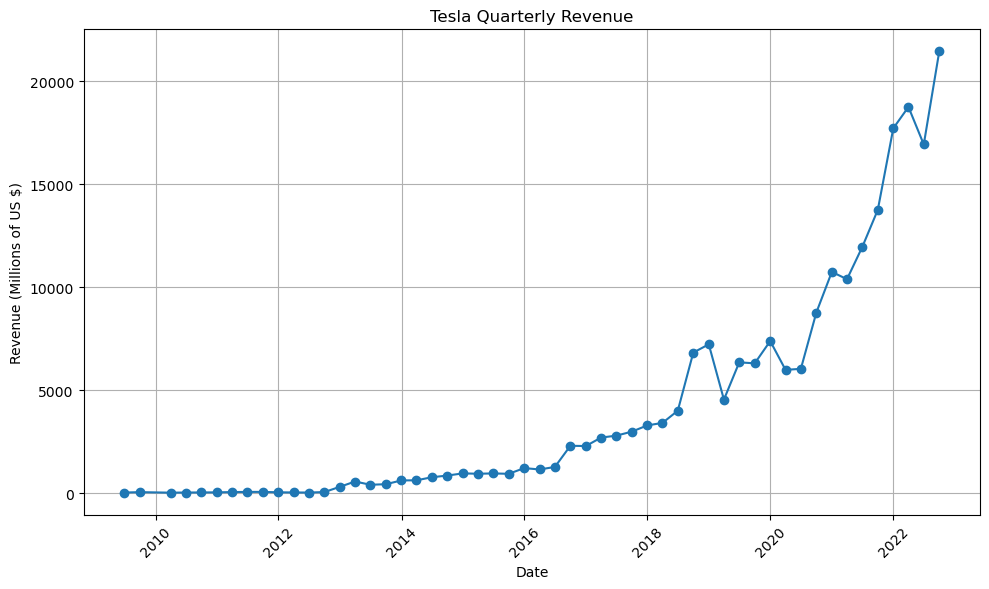

In [27]:
#Create A Graph
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(tesla_quarterly_revenue['Date'], tesla_quarterly_revenue['Revenue'], marker='o', linestyle='-')
plt.title('Tesla Quarterly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (Millions of US $)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


In [28]:
print(gme_revenue.dtypes)

Date        int64
Revenue    object
dtype: object


In [30]:
# Convert the 'Revenue' column to integers
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(int)
# Print the updated DataFrame
print(gme_revenue)

    Date  Revenue
0   2020     6466
1   2019     8285
2   2018     8547
3   2017     7965
4   2016     9364
5   2015     9296
6   2014     9040
7   2013     8887
8   2012     9551
9   2011     9474
10  2010     9078
11  2009     8806
12  2008     7094
13  2007     5319
14  2006     3092
15  2005     1843


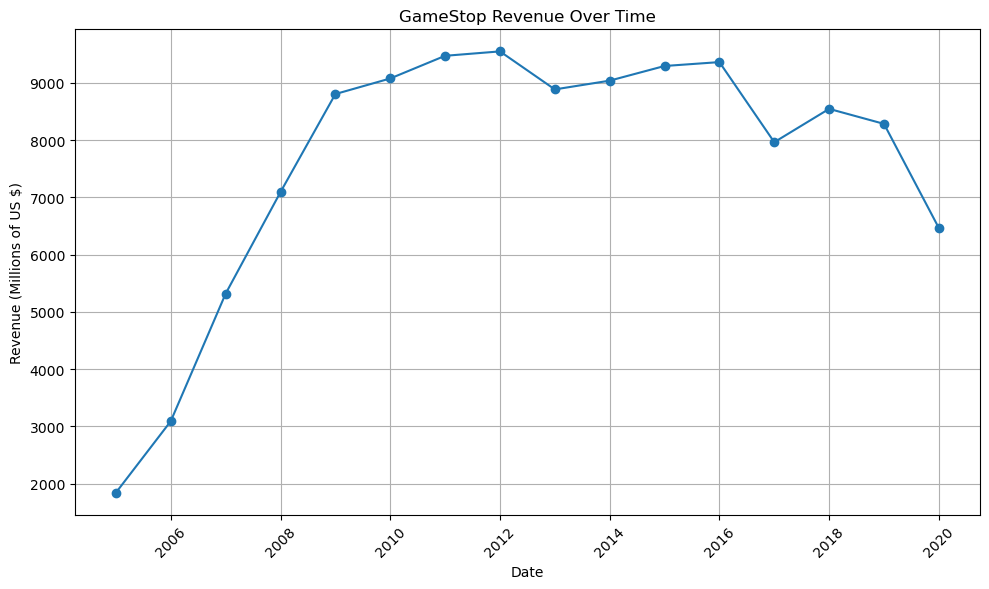

In [31]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(gme_revenue['Date'], gme_revenue['Revenue'], marker='o', linestyle='-')
plt.title('GameStop Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue (Millions of US $)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
print(len(gme_revenue))

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
